In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import LabelEncoder

In [118]:
excel_file_path = '2024_Assignment1_BRSM.xlsx'

## 1. Statistical Deception

In [119]:
sheet_name = 'Statistical Deception'
df1 = pd.read_excel(excel_file_path, sheet_name=sheet_name)
df1


,x1,x2,x3,x4
0,1.000000,1.000000,1.000000,1.000000
1,2.022197,7.103307,1.261219,7.403307
2,2.681359,7.161498,1.522437,7.403307
3,3.180360,7.192361,1.783656,7.403307
4,3.587617,7.214504,2.044874,7.403307
...,...,...,...,...
95,16.412383,12.785496,11.163442,17.932782
96,16.819640,12.807639,10.902223,18.199587
97,17.318641,12.838502,10.641005,18.466391
98,17.977803,12.896693,10.379786,18.733196


### BoxPlot - the deceptive plot

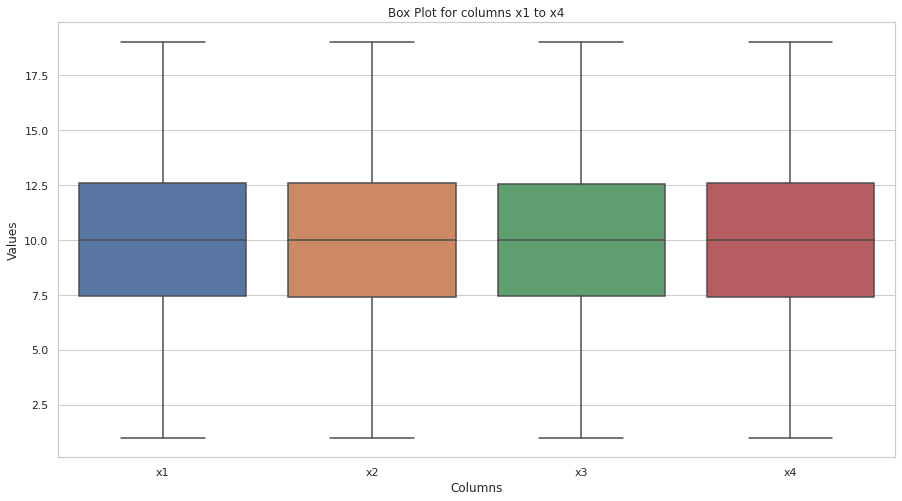

In [121]:

# Customize the plot (optional)
plt.figure(figsize=(15,8))

sns.boxplot(data=df1[['x1', 'x2', 'x3', 'x4']])
sns.set(style='whitegrid')
plt.title('Box Plot for columns x1 to x4')
plt.xlabel('Columns')
plt.ylabel('Values')
# Show the plot
plt.show()



+ The `BoxPlot` primarily displays medians, quartiles and potential outliers.
+ We note that in `BoxPlot` for the above data, despite the values being different, the plot for each of the columns comes out to be same. It fails to capture the nuances when the distributions are similar.
+ The boxplots for each of the 4 columns x1...x4 are vertically aligned and without any outliers.



### Violin Plot

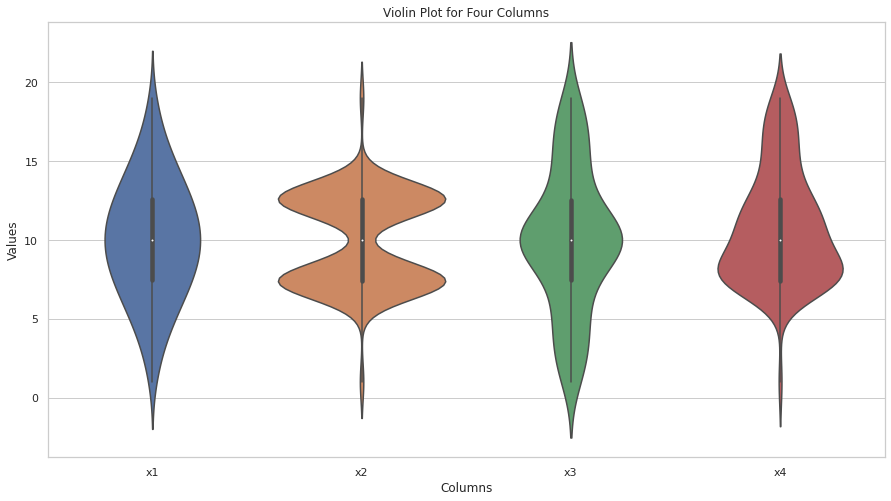

In [50]:
plt.figure(figsize=(15,8))
sns.violinplot(data=df1[['x1', 'x2', 'x3', 'x4']])
sns.set(style='whitegrid')

plt.title('Violin Plot for Four Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

+ A `violin plot` as seen above, provides a more detailed view of the data distribution. 
+ It includes the information present in box plots (median, quartiles) but also depicts the entire probability distribution of the data, showing the density of values at different levels. 

+ This is particularly helpful when we have multiple datasets with similar box plot representations, as the violin plot allows us to see variations in density.

## 2. Personality and Motion

In [95]:

sheet_name = 'Movement Personality Results'
df2 = pd.read_excel(excel_file_path, sheet_name=sheet_name)
df2

,Movements,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,Root,0.139050,0.000000,0.325481,0.147281,0.169475
1,Hips,0.530089,0.477398,0.804277,0.547530,0.686413
2,Knee,0.869004,1.000000,0.662191,0.936127,1.000000
3,Ankle,0.964990,0.723205,0.638736,1.000000,0.735433
4,Toe,0.982430,0.590160,0.851289,0.893272,0.970389
5,Torso,0.551036,0.372635,0.489920,0.638199,0.611516
6,Neck,0.000000,0.057604,0.000000,0.000000,0.000000
7,Head,0.837630,0.502632,0.839598,0.555689,0.797577
8,Shoulder,0.318785,0.540544,0.844912,0.418395,0.347727
9,Elbow,0.861450,0.613711,1.000000,0.941450,0.902488


## Radar chart

Now the given data represents personality traits associated with different body movements. A radar chart is suitable for visualizing a multivariate data like this

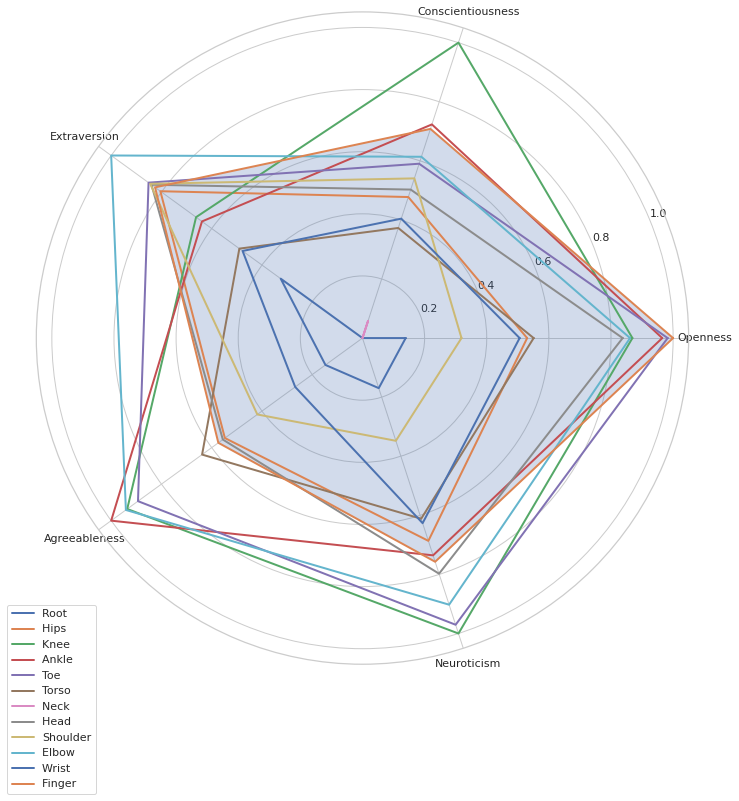

In [124]:
categories = list(df2)[1:]
N = len(categories)

# What will be the angle of each axis in the plot?
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialize the spider plot
# ax = plt.subplot(111, polar=True)
fig, ax = plt.subplots(figsize=(20, 12), subplot_kw=dict(polar=True))

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Plot each individual = each line of the data
for i, row in df2.iterrows():
    values = row.drop('Movements').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=row['Movements'])

# Fill the area with colors
ax.fill(angles, values, alpha=0.25)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()

+ Each axis in the radar chart corresponds to each of the personality traits - Openness, Conscientiousness, Extraversion, Agreeableness, and Neuroticism.
+ Each movement (Root, Hips, Knee, etc.) is represented by a line connecting points on the axes. The position of the points on each axis indicates the level of the corresponding personality trait for that movement

## Heatmap

A heatmap is another good visualization for such type of data, when we want to emphasize the magnitude of values across both movements and personality traits

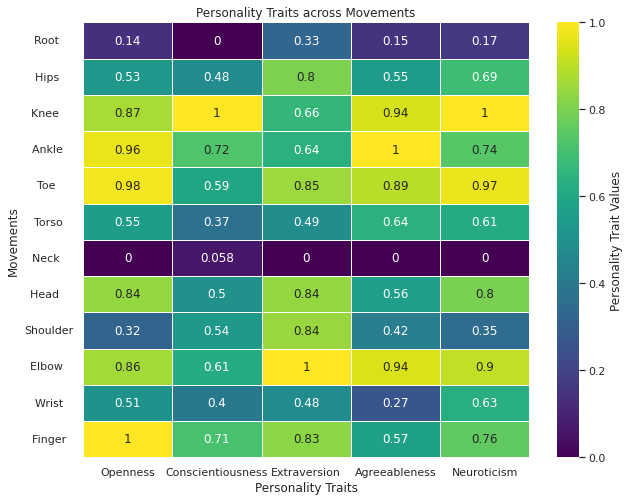

In [16]:
df2.set_index('Movements', inplace=True)

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(df2, cmap='viridis', annot=True, linewidths=.5, cbar_kws={'label': 'Personality Trait Values'})

# Add labels and title
plt.xlabel('Personality Traits')
plt.ylabel('Movements')
plt.title('Personality Traits across Movements')

# Show the plot
plt.show()

+ In this heatmap, each cell represents the value of a specific personality trait for a particular movement.
+ The color intensity indicates the magnitude of the value, allowing you to easily identify patterns and variations across movements and traits
+ The color scale to the right of the plot represents mapping of intensity values to color. Blue denotes 0 indication of personality by that parts movement, while yellow indicates highets (=1) indication.

### Which is better of the two

The radar chart is a more efficient visual representation of the given multivariate data, for the following reasons:
1. Radar plots allow for a clear representation of the individual joint's contribution to each personality trait. Each spoke in the radar plot corresponds to a joint, making it easy to observe the relative importance of each joint for each personality trait separately.

2. Radar plots effectively highlight extremes or outliers in joint importance e.g. Joints with exceptionally high or low importance for specific personality traits. 

3. Radar plots prioritize the visual patterns and trends in the data over precise numeric values. This is beneficial when the main goal is to understand the relative importance of joints for personality traits rather than focusing on exact numerical comparisons, in case oh heatmap

## 3. Data Plotting Adventure

### 3.1 Survival Outcome

Here, we have 4 categories of areas - Safe Zone, Contaminated City, Rural Area and Isolated Island and within each category we further have to depict 4 types:
1. Males that turned into zombies
2. Males that survived
3. Females that turned into zombies
4. Females that survived

#### For such grouped data, a stacked bar chart or grouped bar chart can provide clear comparison among each categeory in a particular area and further within different areas

In [145]:
locations = ['Safe Zone', 'Contaminated City', 'Rural Area', 'Isolated Island']
categories = ['Males that Turned into Zombies', 'Males that Survived', 'Females that turned into Zombies', 'Females that Survived']

data = np.array([
    [118, 62, 4, 141],
    [154, 25, 13, 93],
    [422, 88, 106, 90],
    [670, 192, 3, 20]
])

### Grouped bar chart

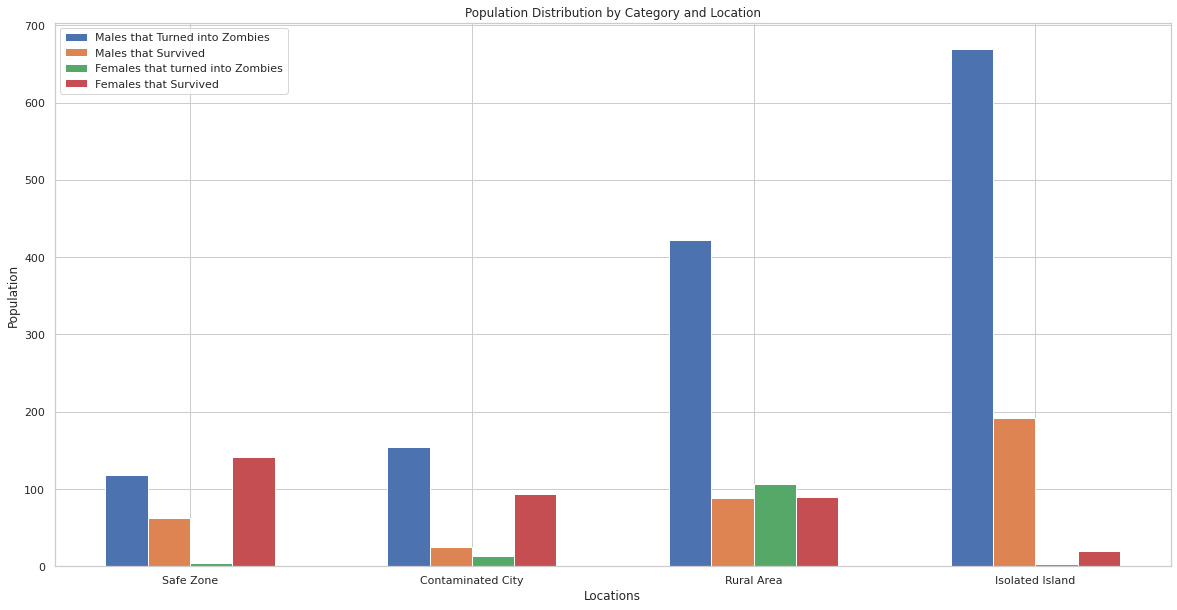

In [138]:

index = np.arange(len(locations))

fig, ax = plt.subplots(figsize=(20, 10))

for i in range(len(categories)):
    bar_width = 0.15
    ax.bar(index + i * bar_width, data[:, i], bar_width, label=categories[i])

ax.set_xlabel('Locations')
ax.set_ylabel('Population')
ax.set_title('Population Distribution by Category and Location')
ax.set_xticks(index + (bar_width * (len(categories) - 1)) / 2)
ax.set_xticklabels(locations)
ax.legend()

plt.show()

### Stacked Bar chart

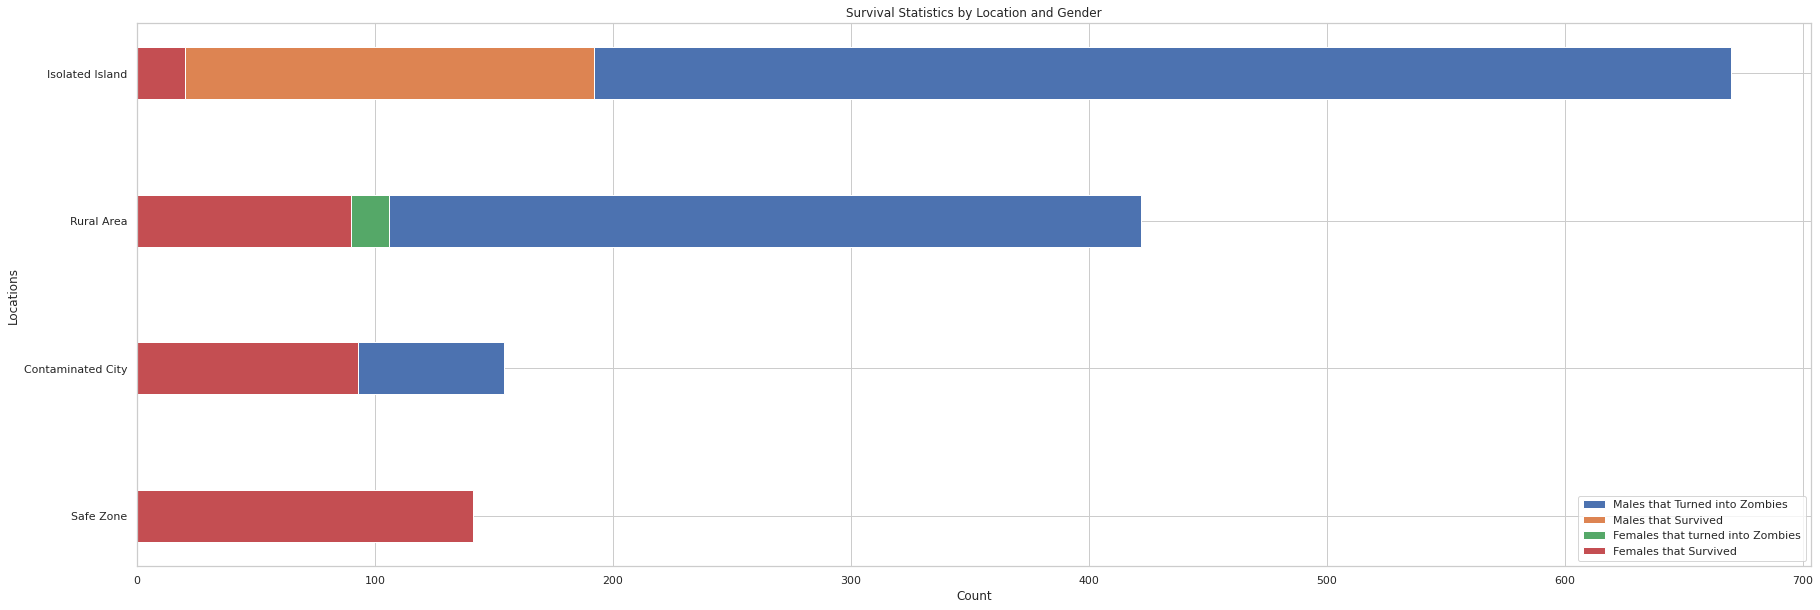

In [155]:
import matplotlib.pyplot as plt
import numpy as np

locations = ['Safe Zone', 'Contaminated City', 'Rural Area', 'Isolated Island']
categories = ['Males that Turned into Zombies', 'Males that Survived', 'Females that turned into Zombies', 'Females that Survived']

data = np.array([
    [118, 62, 4, 141],
    [154, 25, 13, 93],
    [422, 88, 106, 90],
    [670, 192, 3, 20]
])


fig, ax = plt.subplots(figsize=(30, 10))

for i, category in enumerate(categories):
    bar_width = 0.35
    bar_positions = np.arange(len(locations))
    bottom_values = np.zeros(len(locations))
    values = data[:, i]
    ax.barh(bar_positions, values, bar_width, label=category, left=bottom_values)
    bottom_values += values

ax.set_ylabel('Locations')
ax.set_xlabel('Count')
ax.set_title('Survival Statistics by Location and Gender')
ax.set_yticks(bar_positions)
ax.set_yticklabels(locations)
ax.legend()

plt.show()


### Mosaic

Another efficient way to represent such categorical data is a mosaic chart.

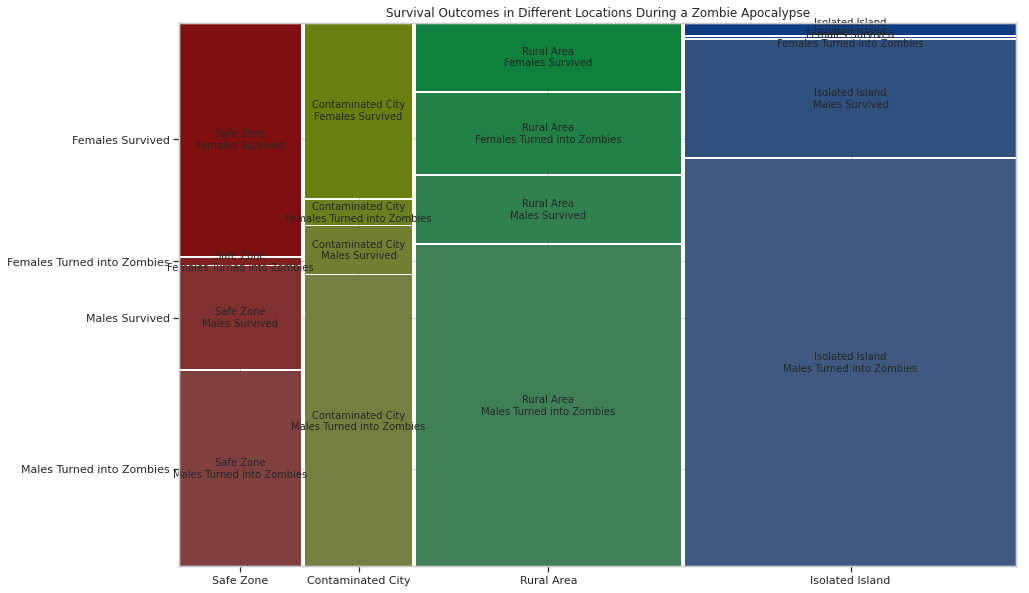

In [21]:
data = {
    ('Safe Zone', 'Males Turned into Zombies'): 118,
    ('Safe Zone', 'Males Survived'): 62,
    ('Safe Zone', 'Females Turned into Zombies'): 4,
    ('Safe Zone', 'Females Survived'): 141,
    ('Contaminated City', 'Males Turned into Zombies'): 154,
    ('Contaminated City', 'Males Survived'): 25,
    ('Contaminated City', 'Females Turned into Zombies'): 13,
    ('Contaminated City', 'Females Survived'): 93,
    ('Rural Area', 'Males Turned into Zombies'): 422,
    ('Rural Area', 'Males Survived'): 88,
    ('Rural Area', 'Females Turned into Zombies'): 106,
    ('Rural Area', 'Females Survived'): 90,
    ('Isolated Island', 'Males Turned into Zombies'): 670,
    ('Isolated Island', 'Males Survived'): 192,
    ('Isolated Island', 'Females Turned into Zombies'): 3,
    ('Isolated Island', 'Females Survived'): 20
}

# Plotting the mosaic plot
sns.set(style='whitegrid', palette='viridis')
fig, ax = plt.subplots(figsize=(15, 10))

# Plotting the mosaic plot
mosaic(data, title='Survival Outcomes in Different Locations During a Zombie Apocalypse', ax=ax)

# Show the plot
plt.show()

### 3.2 Glass Glimpse

In [98]:
sheet_name = 'Glass Glimpse'
df3 = pd.read_excel(excel_file_path, sheet_name=sheet_name)

type_mapping = {1: 'building-windows-float-processed', 2: 'building-windows-non-float-processed', 3: 'vehicle-windows-float-processed', 4: 'vehicle-windows-non-float-processed', 5: 'containers', 6: 'tableware', 7: 'headlamps'}
df3['Type_Label'] = df3['Type'].map(type_mapping)
df3

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Type_Label
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,building-windows-float-processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,building-windows-float-processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,building-windows-float-processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,building-windows-float-processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,building-windows-float-processed
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,headlamps
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,headlamps
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,headlamps
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,headlamps


## BoxPlot

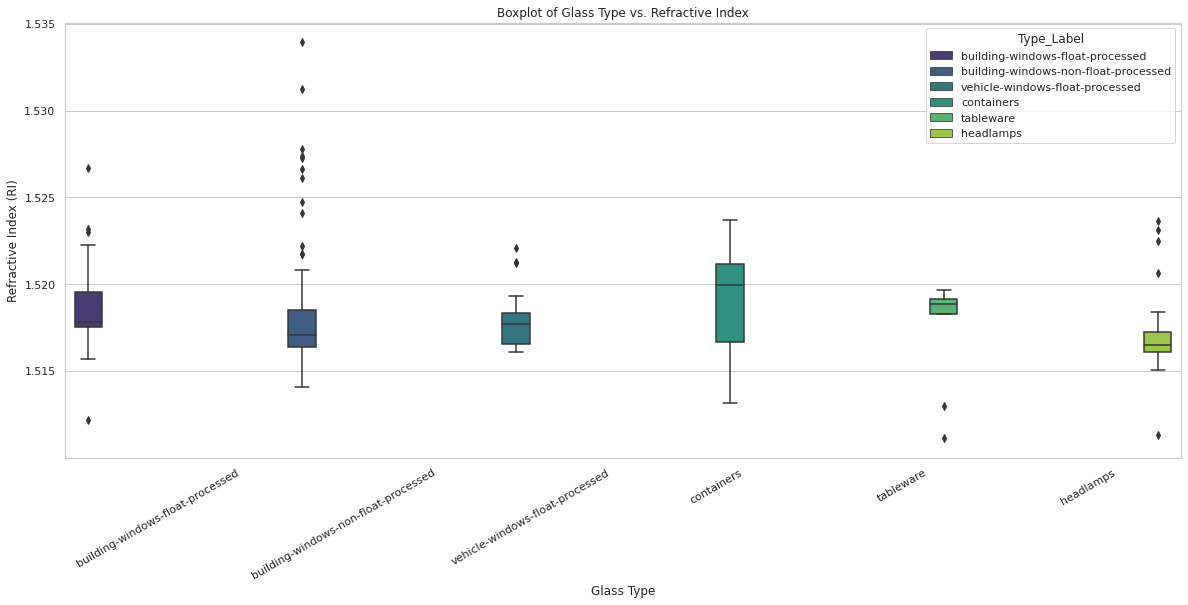

In [99]:
sns.set(style='whitegrid')
plt.figure(figsize=(20, 8))

sns.boxplot(data=df3, x='Type_Label', y='RI', hue='Type_Label', palette='viridis', width=0.9)

plt.title('Boxplot of Glass Type vs. Refractive Index')
plt.xlabel('Glass Type')
plt.ylabel('Refractive Index (RI)')

plt.xticks(rotation=30)

plt.show()

### we see that box plot efficiently 

## Violin Plot

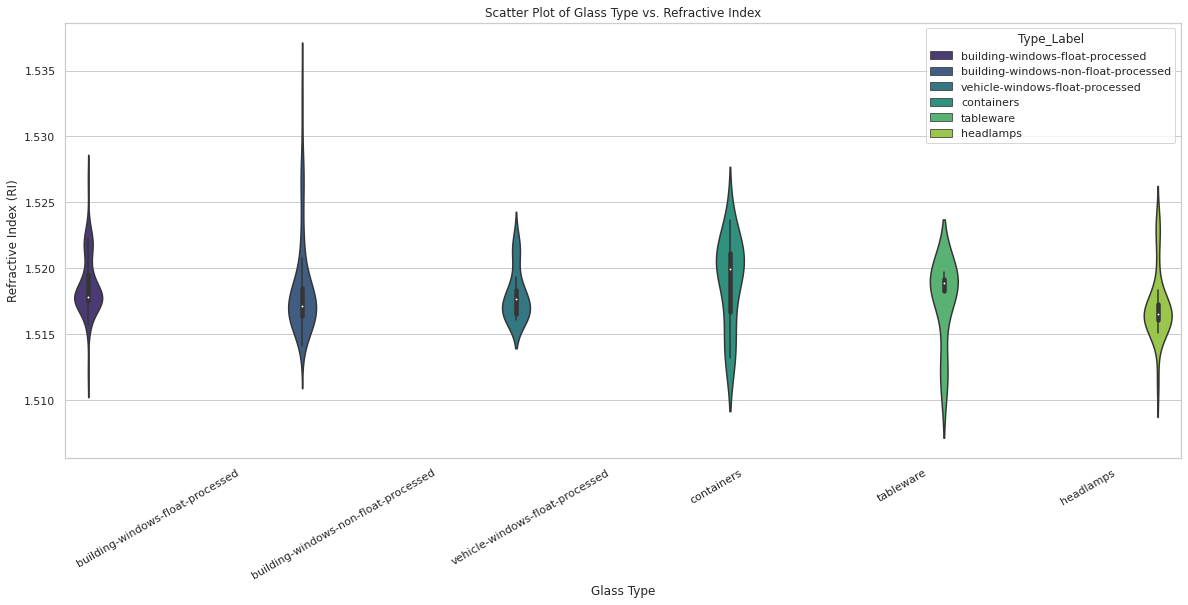

In [49]:
sns.set(style='whitegrid')
plt.figure(figsize=(20, 8))  # Adjust the size as needed

sns.violinplot(data=df3, x='Type_Label', y='RI', hue='Type_Label', palette='viridis', width=0.9)

plt.title('Scatter Plot of Glass Type vs. Refractive Index')
plt.xlabel('Glass Type')
plt.ylabel('Refractive Index (RI)')
plt.xticks(rotation=30) 
plt.show()


### 3.3 Museum

In [91]:
sheet_name = 'Museum Visitor'
df4 = pd.read_excel(excel_file_path, sheet_name=sheet_name)
df4.set_index('Month', inplace=True)

In [92]:
df4

,America Tropical Interpretive Center,Avila Adobe,Chinese American Museum,Gateway to Nature Center,Firehouse Museum
Month,,,,,
Jan 2014,6602.0,24778.0,1581.0,NaN,4486.0
Feb 2014,5029.0,18976.0,1785.0,NaN,4172.0
Mar 2014,8129.0,25231.0,3229.0,NaN,7082.0
Apr 2014,2824.0,26989.0,2129.0,NaN,6756.0
May 2014,10694.0,36883.0,3676.0,NaN,10858.0
...,...,...,...,...,...
May 2023,3816.0,16085.0,3468.0,0.0,5565.0
Jun 2023,2227.0,13604.0,1983.0,0.0,3733.0
Jul 2023,2057.0,13607.0,1768.0,0.0,2589.0


### Line Plot

#### A major reason for using line plot is that the given data is time-series and structured with regular intervals (monthly). Let us look at some other reasons:

1. `Temporal Trends` : A multi-line plot is effective for showcasing temporal trends over a continuous variable, such as time. In this dataset, each line represents a different location, and plotting them over months allows for the observation of patterns and changes in visitation over the years.

2. `Comparison of Multiple Locations` : The data involves museums at 5 locations. Using a multi-line plot enables a clear visual comparison of visitation trends for each location, making it easy to identify which locations consistently attract more visitors or experience fluctuations

3. `Seasonal Pattern` : With monthly data spanning several years, we are able to identify seasonal patterns or recurring trends for each location.

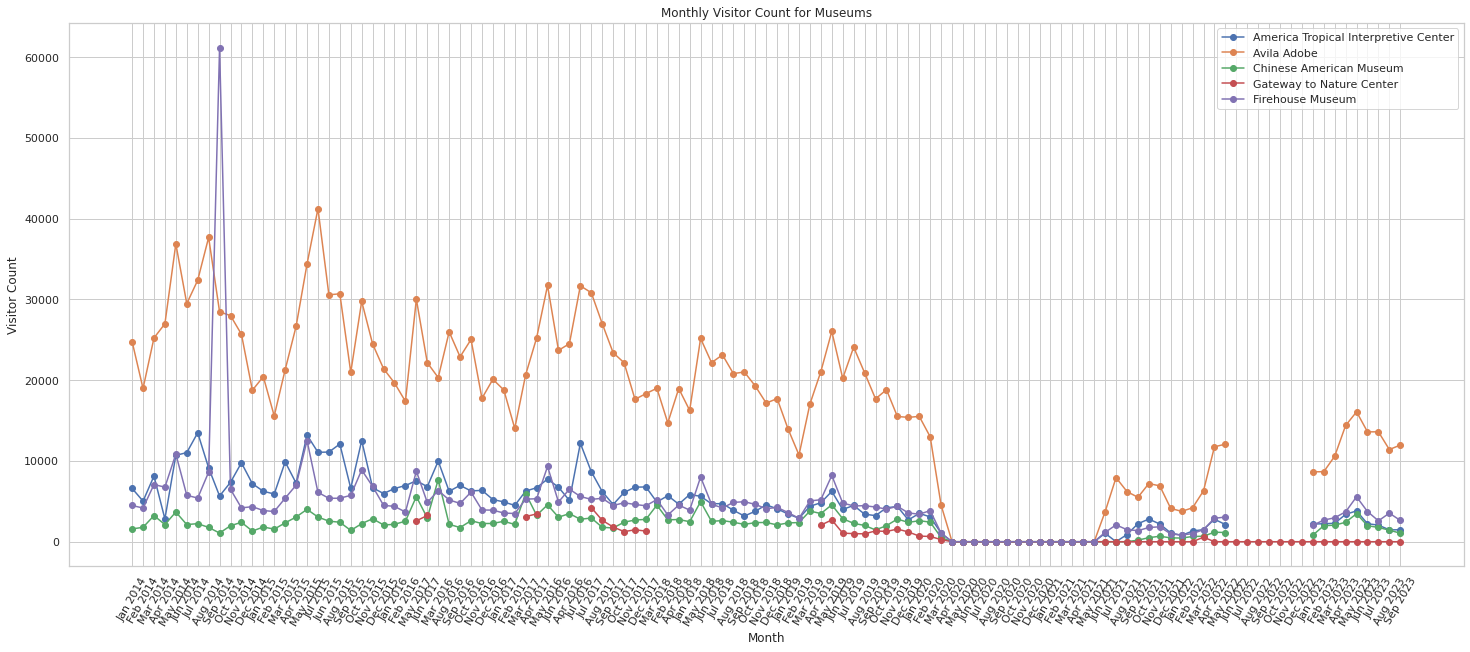

In [39]:
# Plotting the multi-line chart
plt.figure(figsize=(25, 10))  # Adjust the figure size as needed

# Plot each museum's data
for museum in df4.columns:
    plt.plot(df4.index, df4[museum], label=museum, marker="o")

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Visitor Count')
plt.title('Monthly Visitor Count for Museums')
plt.legend()  # To show labels for each line

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)  # Adjust the rotation angle as needed
# Display the plot
plt.show()


## 4 Fast and Furious: Heatmap

In [160]:
sheet_name = 'Fast and Furious'
df5 = pd.read_excel(excel_file_path, sheet_name=sheet_name)

In [161]:
df5

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [165]:
df5.rename(columns={' brand': 'brand'}, inplace=True)
df5.rename(columns={' cubicinches': 'cubicinches'}, inplace=True)
df5.rename(columns={' weightlbs': 'weightlbs'}, inplace=True)
df5

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [172]:
le = LabelEncoder()
df5['brand'] = le.fit_transform(df5['brand'])
df5

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,2
1,31.9,4,89.0,71,1925.0,14,1980,0
2,17.0,8,302.0,140,3449.0,11,1971,2
3,15.0,8,400.0,150,3761.0,10,1971,2
4,30.5,4,98.0,63,2051.0,17,1978,2
...,...,...,...,...,...,...,...,...
256,17.0,8,305.0,130,3840.0,15,1980,2
257,36.1,4,91.0,60,1800.0,16,1979,1
258,22.0,6,232.0,112,2835.0,15,1983,2
259,18.0,6,232.0,100,3288.0,16,1972,2


In [173]:
data_types = df5.dtypes

# Print the data types of each column
print(data_types)

mpg            float64
 cylinders       int64
cubicinches    float64
 hp              int64
weightlbs      float64
time-to-60       int64
 year            int64
brand            int64
dtype: object


In [174]:
df5['cubicinches'] = pd.to_numeric(df5['cubicinches'], errors='coerce')  # coerce will replace non-numeric values with NaN
df5['weightlbs'] = pd.to_numeric(df5['weightlbs'], errors='coerce')

In [175]:
data_types = df5.dtypes

# Print the data types of each column
print(data_types)

mpg            float64
 cylinders       int64
cubicinches    float64
 hp              int64
weightlbs      float64
time-to-60       int64
 year            int64
brand            int64
dtype: object


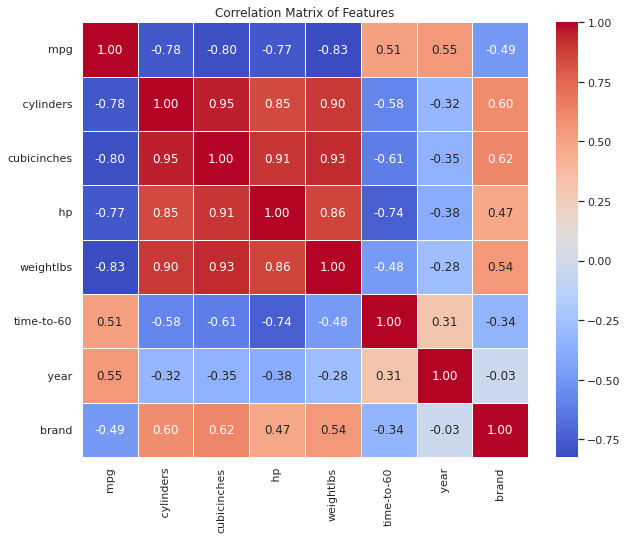

In [176]:
correlation_matrix = df5.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()